In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [8]:
data = pd.read_csv(r"C:\Users\User\Downloads\archive (8).zip")
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [9]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
data.isnull().sum()/len(data)*100

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

In [11]:
data = data.dropna()

In [12]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [14]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [15]:
data.columns = ['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

In [16]:
data.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<AxesSubplot:>

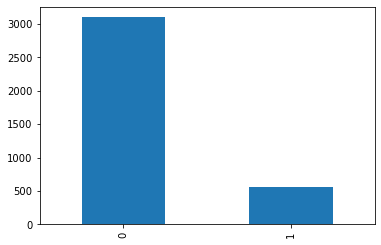

In [17]:
data["TenYearCHD"].value_counts().plot(kind="bar")

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


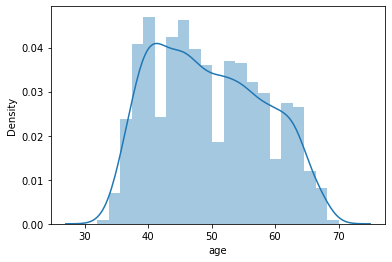

In [18]:
sns.distplot(data["age"])
plt.show()

In [19]:
data.sex.value_counts()

0    2034
1    1622
Name: sex, dtype: int64

In [20]:
# Compare TenYearCHD column with male column
pd.crosstab(data.TenYearCHD, data.sex)

sex,0,1
TenYearCHD,,
0,1784,1315
1,250,307


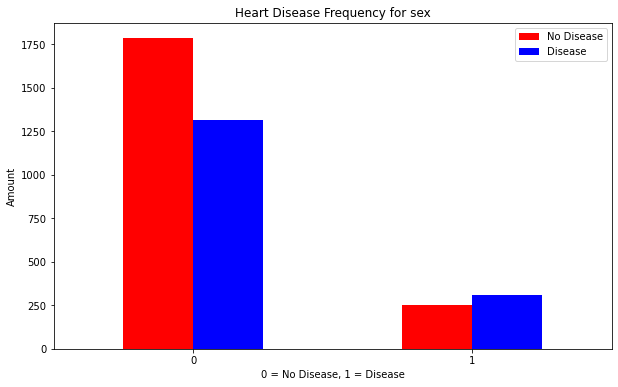

In [21]:
# create a plot of crosstab
pd.crosstab(data.TenYearCHD, data.sex).plot(kind='bar', figsize=(10, 6), color=['red', 'blue']);

plt.title('Heart Disease Frequency for sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease']);
plt.xticks(rotation=0);

<AxesSubplot:>

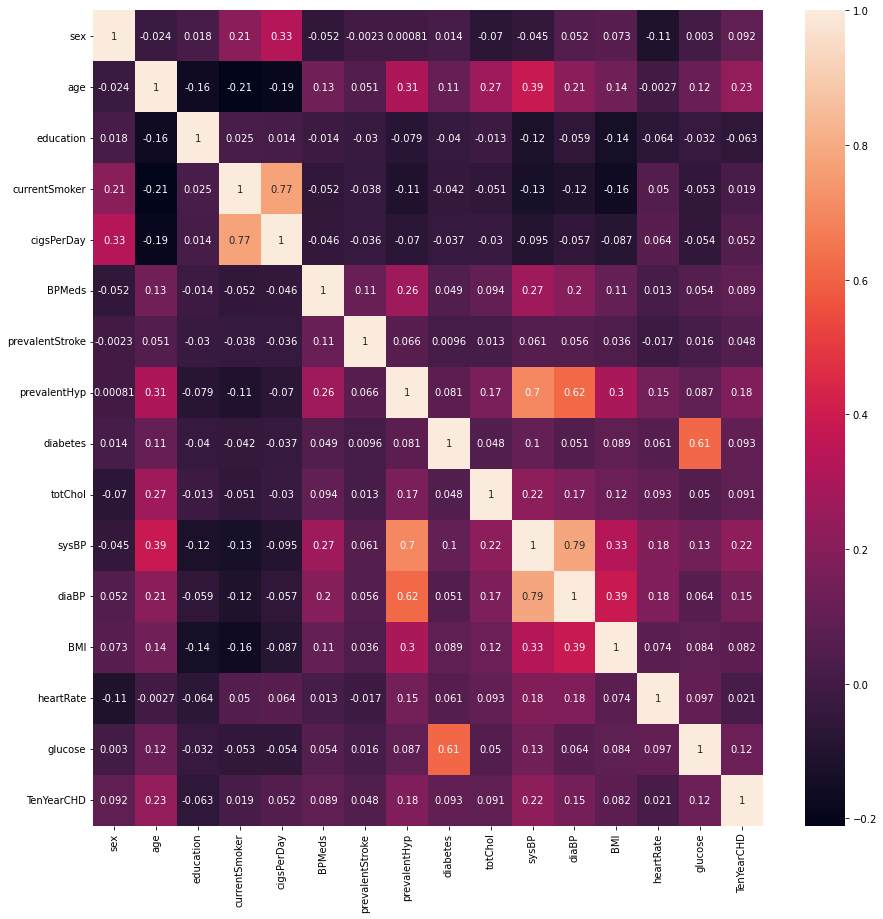

In [22]:
# checking correlation of our variables

corr = data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True)

In [23]:
len_of_patients_without_TenYearCHD = len(data['TenYearCHD'][data.TenYearCHD==0])
len_of_patients_with_TenYearCHD = len(data['TenYearCHD'][data.TenYearCHD==1])

arr= np.array([len_of_patients_without_TenYearCHD, len_of_patients_with_TenYearCHD])
labels= ["WITHOUT", "WITH"]
print("total number of patients without TenYearCHD", len_of_patients_without_TenYearCHD)
print("total number of patients with TenYearCHD",len_of_patients_with_TenYearCHD)


total number of patients without TenYearCHD 3099
total number of patients with TenYearCHD 557


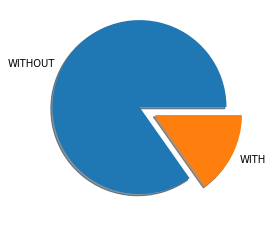

In [24]:
plt.pie(arr, labels=labels, explode= [0.2, 0.0], shadow=True)
plt.show()

In [25]:
#divide into target variable and predictors
y = data["TenYearCHD"] # our target variable
x = data.drop(["TenYearCHD"],axis = 1)

In [26]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3656, dtype: int64

In [27]:
x

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0


In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [29]:
print("shape of x train", x_train.shape)
print("shape of x test", x_test.shape)
print("shape of y train", y_train.shape)
print("shape of y test", y_test.shape)

shape of x train (2559, 15)
shape of x test (1097, 15)
shape of y train (2559,)
shape of y test (1097,)


In [30]:
import warnings 
warnings.filterwarnings('ignore')

In [31]:
#train the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [32]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
y_test

2013    0
3000    0
1151    0
3853    1
2453    0
       ..
1298    1
892     0
1134    0
2368    0
1630    0
Name: TenYearCHD, Length: 1097, dtype: int64

In [34]:
pd.DataFrame({ 
    'y_prediction': y_pred,
    'y': y_test})

,y_prediction,y
2013,0,0
3000,0,0
1151,0,0
3853,0,1
2453,0,0
...,...,...
1298,1,1
892,0,0
1134,0,0
2368,0,0


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Confusion Matrix:
[[924   4]
 [161   8]]
Accuracy: 0.8495897903372835
Precision: 0.6666666666666666
Recall: 0.047337278106508875
F1 Score: 0.0883977900552486


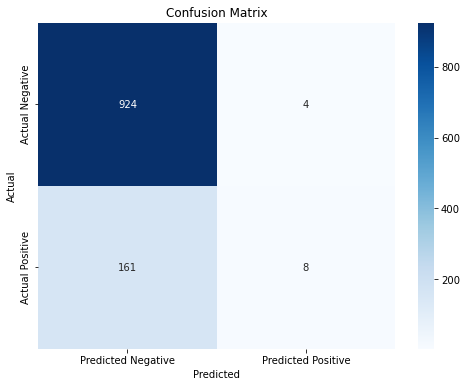

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)


In [38]:
x_train_scaled

array([[ 1.11921439, -0.87130483,  0.01402829, ..., -1.00465711,
        -0.16427006, -0.32792895],
       [ 1.11921439, -0.17169107,  0.01402829, ..., -1.75506666,
         0.24915155,  0.02919852],
       [-0.89348387,  1.57734334, -0.95619851, ...,  0.50818778,
        -0.08158574,  0.18792183],
       ...,
       [ 1.11921439,  1.46074105,  0.98425509, ..., -1.19706981,
        -1.32185058, -0.08984397],
       [-0.89348387, -1.80412319,  0.01402829, ..., -0.20614438,
         1.98552231, -0.40729061],
       [ 1.11921439,  1.57734334, -0.95619851, ...,  0.3085596 ,
        -0.32963871,  0.148241  ]])

In [39]:
x_test_scaled

array([[ 1.12125004,  0.26345409,  2.02749828, ..., -0.30423881,
        -2.14960057,  0.34542114],
       [ 1.12125004, -0.67564952,  0.03362503, ..., -0.62738743,
        -0.26796914, -0.04402078],
       [-0.89186173, -1.37997722,  0.03362503, ...,  2.04640678,
        -0.01138304, -0.04402078],
       ...,
       [-0.89186173,  1.67210949, -0.9633116 , ..., -0.2260577 ,
         1.69919099,  0.19938042],
       [-0.89186173,  0.49822999,  0.03362503, ...,  0.44369388,
        -0.01138304, -0.48214294],
       [ 1.12125004,  0.85039384, -0.9633116 , ..., -0.05927131,
        -0.86667005, -0.04402078]])

In [40]:
lr.fit(x_train_scaled, y_train)
y_test_pred=lr.predict(x_test_scaled)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
accuracy = accuracy_score(y_test_pred, y_test)
precision = precision_score(y_test_pred, y_test)
recall = recall_score(y_test_pred, y_test)
f1 = f1_score(y_test_pred, y_test)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8523245214220602
Precision: 0.0650887573964497
Recall: 0.7333333333333333
F1 Score: 0.11956521739130434


In [42]:
cm = confusion_matrix(y_test_pred, y_test)
print(cm)


[[924 158]
 [  4  11]]


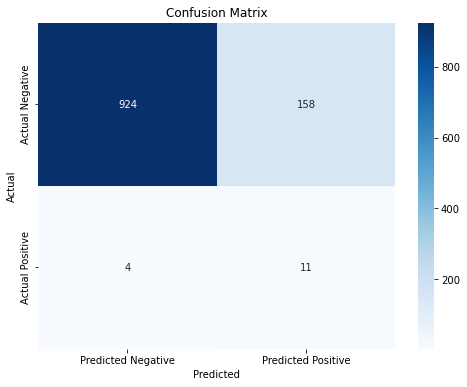

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [44]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train_scaled, y_train)
svc_prediction = svc_model.predict(x_test_scaled)
svc_accuracy= accuracy_score(svc_prediction, y_test)
svc_accuracy


0.845031905195989

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_scaled, y_train)
dt_prediction = dt_model.predict(x_test_scaled)
dt_accuracy= accuracy_score(dt_prediction, y_test)
dt_accuracy

0.7474931631722881

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)
rf_prediction = rf_model.predict(x_test_scaled)
rf_accuracy= accuracy_score(rf_prediction, y_test)
rf_accuracy

0.8477666362807658

In [47]:
pip install xgboost

In [48]:
from xgboost import XGBClassifier
xg_model = RandomForestClassifier()
xg_model.fit(x_train_scaled, y_train)
xg_prediction = xg_model.predict(x_test_scaled)
xg_accuracy= accuracy_score(xg_prediction, y_test)
xg_accuracy

0.8441203281677302

In [54]:
y_train_pred = xg_model.predict(x_train_scaled)
accuracy_score(y_train_pred, y_train)

1.0